In [ ]:
import numpy as np
import pandas as pd
df= pd.read_csv('/content/Combined_News_DJIA.csv.zip')
df.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [ ]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from random import randint
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('/content/Combined_News_DJIA.csv.zip', encoding = 'ISO-8859-1')
df.dropna(inplace=True)
print(df.shape)
df.head(2)

(1986, 27)


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."


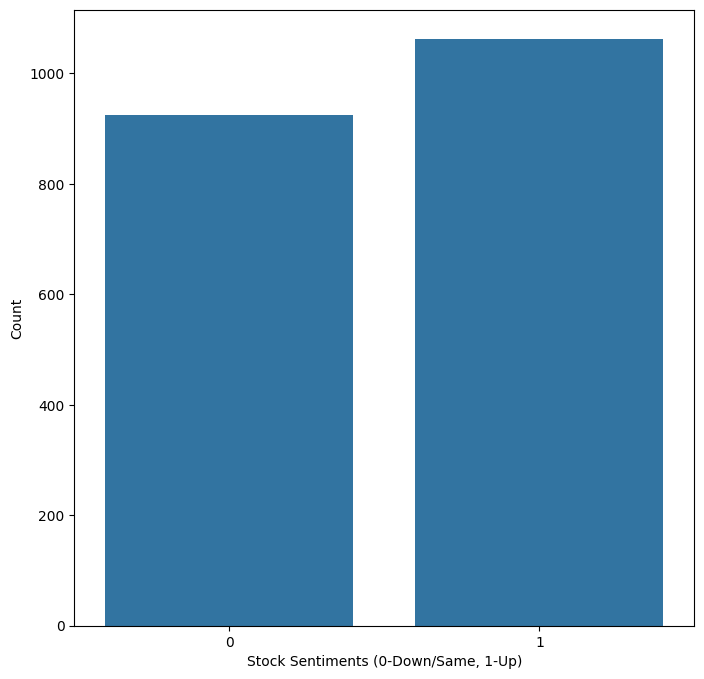

In [ ]:
plt.figure(figsize=(8,8))
sns.countplot(x='Label', data=df)
plt.xlabel('Stock Sentiments (0-Down/Same, 1-Up)')
plt.ylabel('Count')
plt.show()

In [ ]:
df_copy = df.copy()
df_copy.reset_index(inplace=True)
train = df_copy[df_copy['Date'] < '20150101']
test = df_copy[df_copy['Date'] > '20141231']
y_train = train['Label']
train = train.iloc[:, 3:28]
y_test = test['Label']
test = test.iloc[:, 3:28]

In [ ]:
train.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)
test.replace(to_replace='[^a-zA-Z]', value=' ', regex=True, inplace=True)

In [ ]:
new_columns = [str(i) for i in range(0,25)]
train.columns = new_columns
test.columns = new_columns
for i in new_columns:
  train[i] = train[i].str.lower()
  test[i] = test[i].str.lower()

In [ ]:
train_headlines = []
test_headlines = []
for row in range(0, train.shape[0]):
  train_headlines.append(' '.join(str(x) for x in train.iloc[row, 0:25]))
for row in range(0, test.shape[0]):
  test_headlines.append(' '.join(str(x) for x in test.iloc[row, 0:25]))

In [ ]:
ps = PorterStemmer()
train_corpus = []
for i in range(0, len(train_headlines)):
  words = train_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  train_corpus.append(headline)

In [ ]:
test_corpus = []
for i in range(0, len(test_headlines)):
  words = test_headlines[i].split()
  words = [word for word in words if word not in set(stopwords.words('english'))]
  words = [ps.stem(word) for word in words]
  headline = ' '.join(words)
  test_corpus.append(headline)

In [ ]:
down_words = []
for i in list(y_train[y_train==0].index):
  down_words.append(train_corpus[i])
up_words = []
for i in list(y_train[y_train==1].index):
  up_words.append(train_corpus[i])

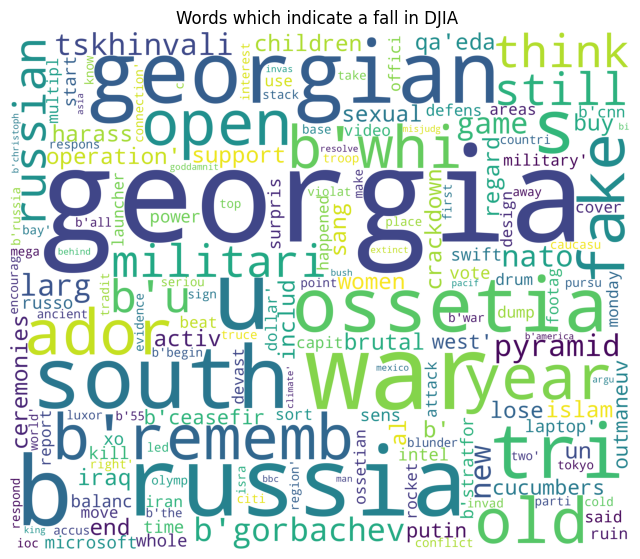

In [ ]:
from wordcloud import WordCloud
wordcloud1 = WordCloud(background_color='white', width=3000, height=2500).generate(down_words[1])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title("Words which indicate a fall in DJIA ")
plt.show()

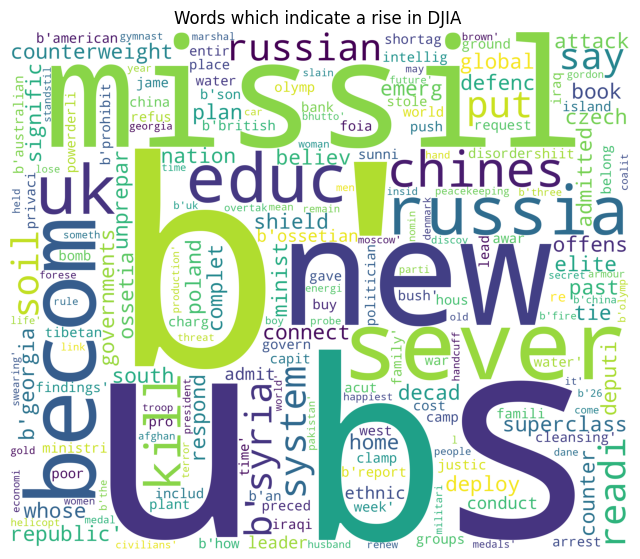

In [ ]:
wordcloud2 = WordCloud(background_color='white', width=3000, height=2500).generate(up_words[5])
plt.figure(figsize=(8,8))
plt.imshow(wordcloud2)
plt.axis('off')
plt.title("Words which indicate a rise in DJIA ")
plt.show()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=10000, ngram_range=(2,2))
X_train = cv.fit_transform(train_corpus).toarray()
X_test = cv.transform(test_corpus).toarray()

from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train, y_train)
lr_y_pred = lr_classifier.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score
score1 = accuracy_score(y_test, lr_y_pred)
score2 = precision_score(y_test, lr_y_pred)
score3 = recall_score(y_test, lr_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 84.92%
Precision score is: 0.85
Recall score is: 0.85


In [ ]:
from sklearn.metrics import confusion_matrix
lr_cm = confusion_matrix(y_test, lr_y_pred)
lr_cm

array([[158,  28],
       [ 29, 163]])

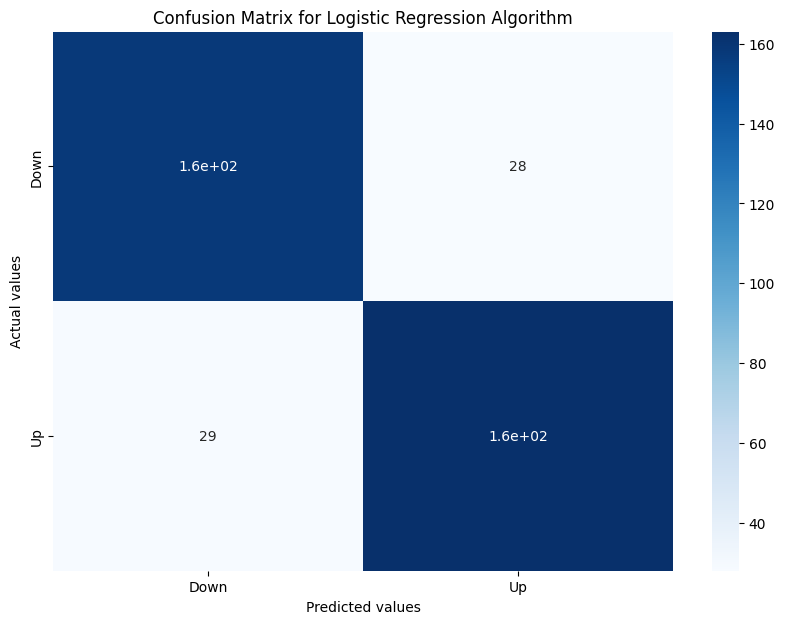

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=lr_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Logistic Regression Algorithm')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, criterion='entropy')
rf_classifier.fit(X_train, y_train)
rf_y_pred = rf_classifier.predict(X_test)
score1 = accuracy_score(y_test, rf_y_pred)
score2 = precision_score(y_test, rf_y_pred)
score3 = recall_score(y_test, rf_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 84.13%
Precision score is: 0.8
Recall score is: 0.91


In [ ]:
rf_cm = confusion_matrix(y_test, rf_y_pred)
rf_cm

array([[143,  43],
       [ 17, 175]])

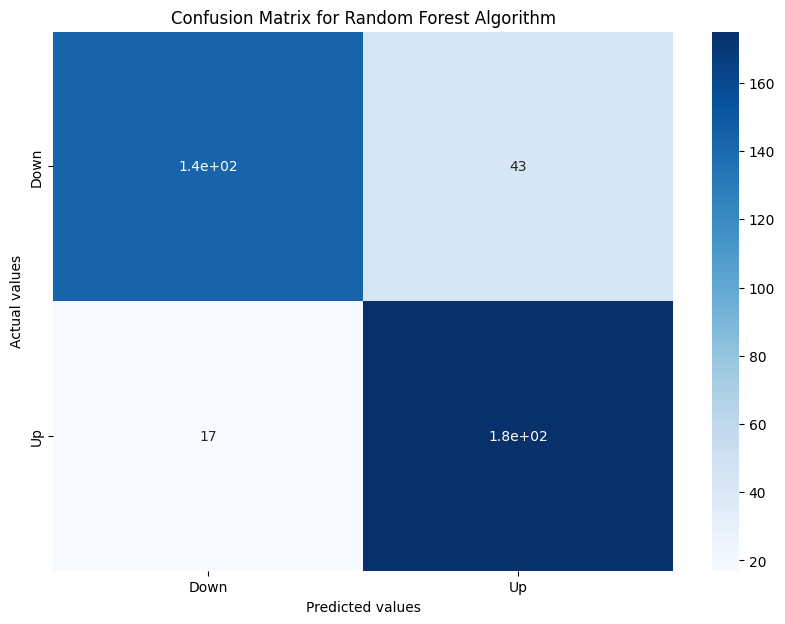

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=rf_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Random Forest Algorithm')
plt.show()

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train, y_train)
nb_y_pred = nb_classifier.predict(X_test)
score1 = accuracy_score(y_test, nb_y_pred)
score2 = precision_score(y_test, nb_y_pred)
score3 = recall_score(y_test, nb_y_pred)
print("Accuracy score is: {}%".format(round(score1*100,2)))
print("Precision score is: {}".format(round(score2,2)))
print("Recall score is: {}".format(round(score3,2)))

Accuracy score is: 85.45%
Precision score is: 0.87
Recall score is: 0.84


In [ ]:
nb_cm = confusion_matrix(y_test, nb_y_pred)
nb_cm

array([[162,  24],
       [ 31, 161]])

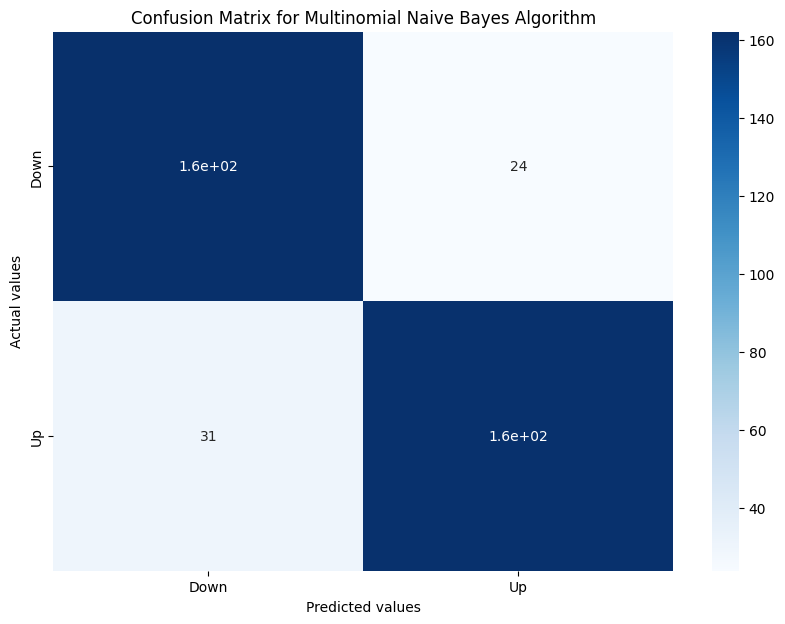

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data=nb_cm, annot=True, cmap="Blues", xticklabels=['Down', 'Up'], yticklabels=['Down', 'Up'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.title('Confusion Matrix for Multinomial Naive Bayes Algorithm')
plt.show()

In [ ]:
def stock_prediction(sample_news):
  sample_news = re.sub(pattern='[^a-zA-Z]',repl=' ', string=sample_news)
  sample_news = sample_news.lower()
  sample_news_words = sample_news.split()
  sample_news_words = [word for word in sample_news_words if not word in set(stopwords.words('english'))]
  ps = PorterStemmer()
  final_news = [ps.stem(word) for word in sample_news_words]
  final_news = ' '.join(final_news)
  temp = cv.transform([final_news]).toarray()
  return lr_classifier.predict(temp)
sample_test = df_copy[df_copy['Date'] > '20141231']
sample_test.reset_index(inplace=True)
sample_test = sample_test['Top1']

In [ ]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Norwegian Air CEO Says $69 Flights From U.S. to Europe Coming Soon
Prediction: The stock price will remain the same or will go down.


In [ ]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Beijing now has more billionaires than New York
Prediction: The stock price will remain the same or will go down.


In [ ]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: German anti-vaccer wagers  100,000 to anyone proving the existance of the measles virus. Researcher sends him articles proving the virus' existance and takes him to court where he's ordered to pay the full amount.
Prediction: The stock price will go up!


In [ ]:
row = randint(0,sample_test.shape[0]-1)
sample_news = sample_test[row]
print('News: {}'.format(sample_news))
if stock_prediction(sample_news):
  print('Prediction: The stock price will remain the same or will go down.')
else:
  print('Prediction: The stock price will go up!')

News: Decriminalisation Call As 'War On Drugs' Fails. Top public health experts say illicit drug use should be treated as a health issue rather than punishing those who need treatment.
Prediction: The stock price will go up!


In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score


In [ ]:
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, criterion='entropy')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='hard')


In [ ]:
voting_clf.fit(X_train, y_train)


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf',
                              RandomForestClassifier(criterion='entropy')),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))])

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score

voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier(n_estimators=100, criterion='entropy')),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss'))
], voting='hard')


voting_clf.fit(X_train, y_train)

voting_y_pred = voting_clf.predict(X_test)

voting_accuracy = accuracy_score(y_test, voting_y_pred)
voting_precision = precision_score(y_test, voting_y_pred)
voting_recall = recall_score(y_test, voting_y_pred)

print(f"Voting Classifier Accuracy: {voting_accuracy*100:.2f}%")
print(f"Voting Classifier Precision: {voting_precision:.2f}")
print(f"Voting Classifier Recall: {voting_recall:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:16:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Accuracy: 82.80%
Voting Classifier Precision: 0.80
Voting Classifier Recall: 0.88


In [ ]:

from xgboost import XGBClassifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgb_model.fit(X_train, y_train)

xgb_y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, precision_score, recall_score

xgb_accuracy = accuracy_score(y_test, xgb_y_pred)
xgb_precision = precision_score(y_test, xgb_y_pred)
xgb_recall = recall_score(y_test, xgb_y_pred)

print(f"XGBoost Accuracy: {xgb_accuracy*100:.2f}%")
print(f"XGBoost Precision: {xgb_precision:.2f}")
print(f"XGBoost Recall: {xgb_recall:.2f}")


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [10:18:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 82.01%
XGBoost Precision: 0.80
XGBoost Recall: 0.86
